# Milestone Project 3: BitPredict 💰📈
*Project adapted from Udemy Course: Tensorflow Developer Certificate in 2023: Zero to Mastery*


---


Using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://www.coindesk.com/price/bitcoin

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2023-04-29 01:26:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.008s  

2023-04-29 01:26:39 (21.2 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
#Import Packages
import matplotlib.pyplot as plt
import pandas as pd 
import csv
from datetime import datetime
import tensorflow as tf
from tensorflow.keras import layers
import os


In [3]:

# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # prase the date column and tell pandas column 1 is a datetime 

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [6]:
#number of samples
len(df)

2787

Only have samples for the past ~8 years but there's 2787 samples.


In [7]:
#Get the closing price for each day.
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


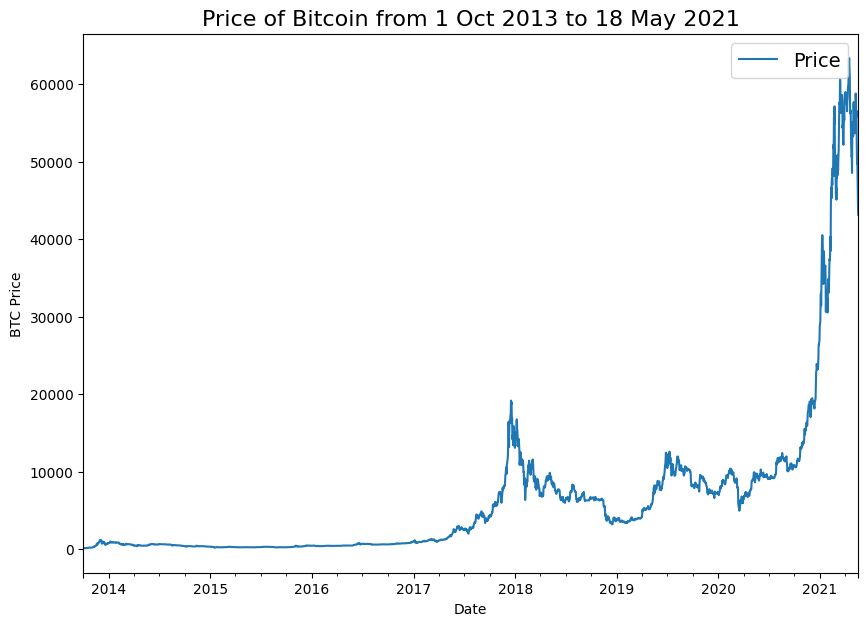

In [8]:
#Ploting the Bitcoin prices
bitcoin_prices.plot(figsize = (10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

In [9]:
timesteps = []
btc_price = []
file_name = "/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"

with open(file_name, 'r') as f:
  csv_reader = csv.reader(f, delimiter = ",")
  #Skip first line (column titles)
  next(csv_reader)

  for line in csv_reader:
    #get the dates as datetype
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    #get the closing price as float
    btc_price.append(float(line[2]))


#View first 10 of each
timesteps[:10], btc_price[:10]



([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

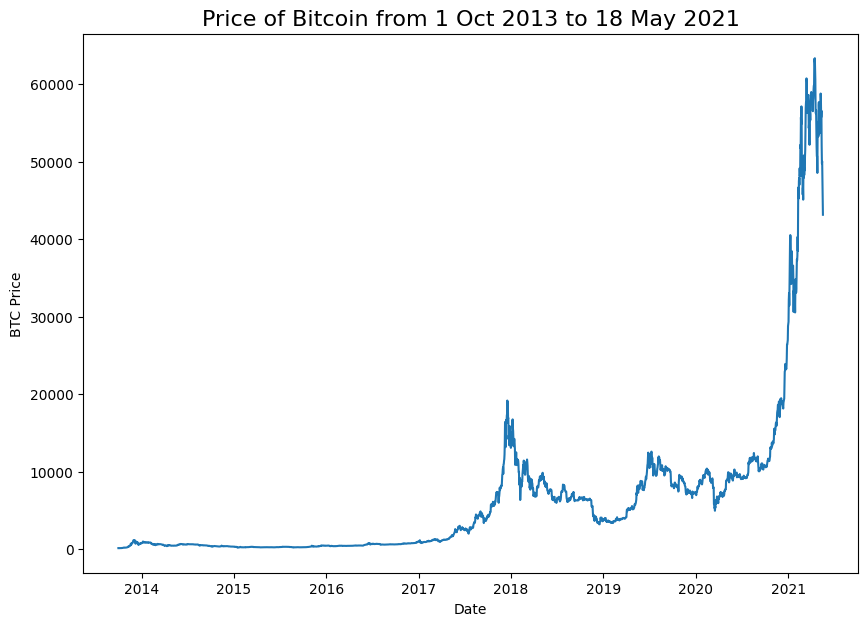

In [10]:
#Plot the timesteps
plt.figure(figsize = (10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
plt.xlabel("Date")
plt.show()

# Create train and test sets of Time Series Data

In [11]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
#80% and 20% Split
split_size = int(0.8* len(prices))

#Create Train Data Splits
X_train, y_train = timesteps[:split_size], prices[:split_size]

#Create Test Data Splits
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

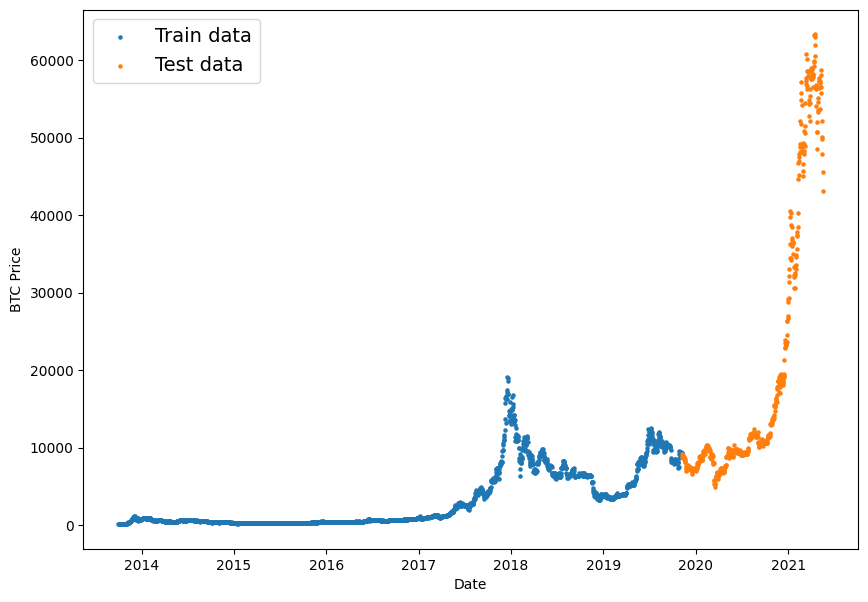

In [13]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [14]:
#Create a Plotting Function
def plot_time_series(timesteps, values, format = ".", start = 0, end = None, label = None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None 
  """
  #Plot the Series
  plt.plot(timesteps[start:end], values[start:end], format, label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)
  

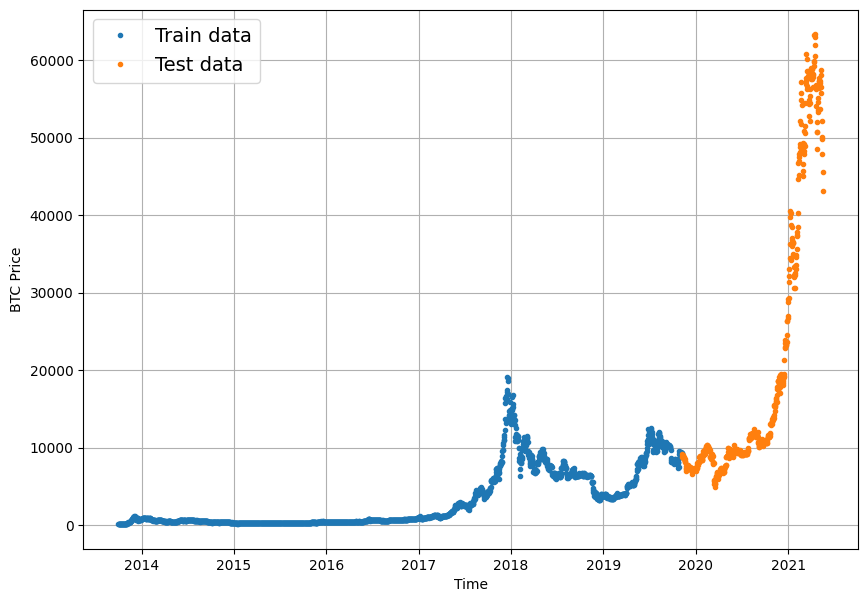

In [15]:
#Testing out the Plotting Function
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_train, values = y_train, label = "Train data")
plot_time_series(timesteps = X_test, values = y_test, label = "Test data")
plt.show()

# Modelling Experiments
- Horizon = number of timesteps into the future we're going to predict
- Window size = number of timesteps we're going to use to predict horizon

### Modelling experiments we're running:
* 0	Naïve model (baseline)	
* 1	Dense model, horizon = 1, window = 7
* 2	Same as 1, 	horizon = 1, window = 30
* 3	Same as 1, 	horizon = 7, window =	30
* 4	Conv1D
* 5	LSTM
* 6	Same as 1 (but with multivariate data)
* 7	N-BEATs Algorithm
* 8	Ensemble (multiple models optimized on different loss functions)
* 9	Future prediction model (model to predict future values)
* 10	Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [16]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [17]:
#Create a naive forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

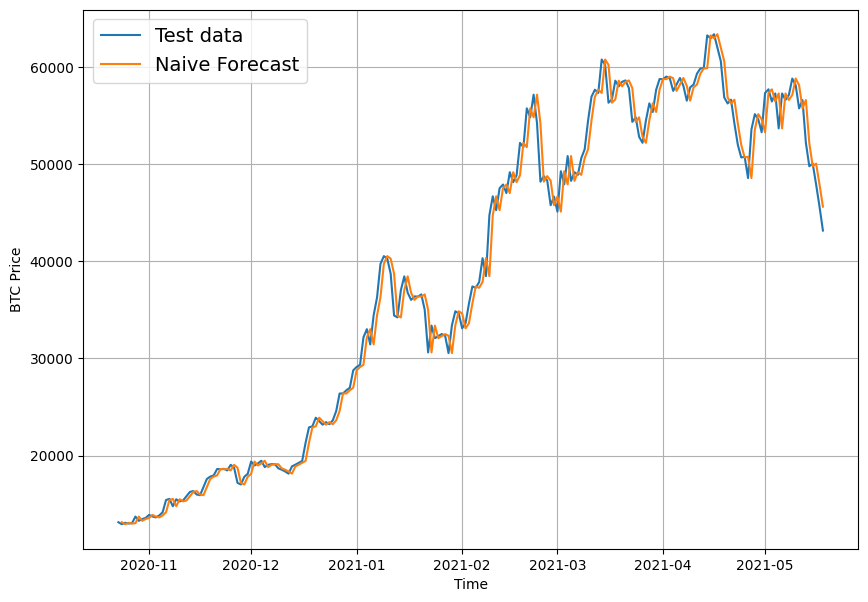

In [18]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")
plt.show()

## Evaluating a time series model

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**

### MASE Implementation

In [19]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  #Find MAE of naive forecast(no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  #seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [20]:
#Testing of MASE Function 
#should be = 1
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [21]:
# Create a function to take in model predictions and truth values
# return evaluation metrics
def evaluate_preds(y_true, y_pred):
  #Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  #Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [22]:
#Testing if it works
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [23]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [24]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [25]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Format Data Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [26]:
# Predict Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [27]:
#Setup Global Variables for Winow and Horizon Size
HORIZON = 1
WINDOW_SIZE = 7

In [28]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [29]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


In [30]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [31]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [32]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [33]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [34]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [35]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [36]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [37]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [38]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [39]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback


In [40]:
# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

First deep model: Simple Dense Model
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizaiton and MAE loss function
* Batch size of 128 (previously we've used 32) 
* 100 epochs 


In [41]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation               
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 2854.4712 - mae: 2854.4712 - mse: 20340096.0000  

18/18 [==============================] - 11s 134ms/step - loss: 2227.1387 - mae: 2227.1387 - mse: 13830118.0000 - val_loss: 3200.4443 - val_mae: 3200.4443 - val_mse: 20438304.0000
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 334.9590 - mae: 334.9590 - mse: 428477.9688

18/18 [==============================] - 1s 63ms/step - loss: 334.9590 - mae: 334.9590 - mse: 428477.9688 - val_loss: 1431.9570 - val_mae: 1431.9570 - val_mse: 5256060.5000
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 228.8013 - mae: 228.8013 - mse: 248183.3281

18/18 [==============================] - 1s 61ms/step - loss: 219.4854 - mae: 219.4854 - mse: 231285.7031 - val_loss: 1071.8538 - val_mae: 1071.8538 - val_mse: 3534613.5000
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 187.7775 - mae: 187.7775 - mse: 185447.8906

18/18 [==============================] - 2s 111ms/step - loss: 184.5919 - mae: 184.5919 - mse: 176063.0938 - val_loss: 998.8386 - val_mae: 998.8386 - val_mse: 3270320.5000
Epoch 5/100
18/18 [==============================] - 0s 12ms/step - loss: 178.9284 - mae: 178.9284 - mse: 172316.8750 - val_loss: 1012.3921 - val_mae: 1012.3921 - val_mse: 3189782.5000
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 169.2941 - mae: 169.2941 - mse: 140986.4062

18/18 [==============================] - 1s 72ms/step - loss: 173.0368 - mae: 173.0368 - mse: 159832.0156 - val_loss: 977.7664 - val_mae: 977.7664 - val_mse: 3187585.5000
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 173.6523 - mae: 173.6523 - mse: 161837.1562

18/18 [==============================] - 1s 34ms/step - loss: 168.7015 - mae: 168.7015 - mse: 153273.7500 - val_loss: 942.1035 - val_mae: 942.1035 - val_mse: 2854943.5000
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 163.5148 - mae: 163.5148 - mse: 146075.4531

18/18 [==============================] - 1s 35ms/step - loss: 163.5926 - mae: 163.5926 - mse: 144883.0781 - val_loss: 899.2596 - val_mae: 899.2596 - val_mse: 2665509.0000
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 158.6158 - mae: 158.6158 - mse: 138734.1094 - val_loss: 909.3528 - val_mae: 909.3528 - val_mse: 2540144.7500
Epoch 10/100
15/18 [========================>.....] - ETA: 0s - loss: 150.3781 - mae: 150.3781 - mse: 122394.7578

18/18 [==============================] - 1s 35ms/step - loss: 153.2859 - mae: 153.2859 - mse: 130061.7812 - val_loss: 839.9073 - val_mae: 839.9073 - val_mse: 2345838.5000
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 146.9664 - mae: 146.9664 - mse: 123144.0781

18/18 [==============================] - 1s 49ms/step - loss: 147.9368 - mae: 147.9368 - mse: 123043.1953 - val_loss: 824.5792 - val_mae: 824.5792 - val_mse: 2202934.7500
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 143.0473 - mae: 143.0473 - mse: 115473.9141 - val_loss: 826.1803 - val_mae: 826.1803 - val_mse: 2107899.5000
Epoch 13/100
18/18 [==============================] - 0s 8ms/step - loss: 142.9810 - mae: 142.9810 - mse: 114647.7578 - val_loss: 844.7784 - val_mae: 844.7784 - val_mse: 2124349.2500
Epoch 14/100
18/18 [==============================] - 0s 8ms/step - loss: 137.5457 - mae: 137.5457 - mse: 107225.6641 - val_loss: 832.3166 - val_mae: 832.3165 - val_mse: 2057814.7500
Epoch 15/100
12/18 [===================>..........] - ETA: 0s - loss: 131.7850 - mae: 131.7850 - mse: 96568.1328

18/18 [==============================] - 1s 48ms/step - loss: 136.9466 - mae: 136.9466 - mse: 105727.7344 - val_loss: 755.2969 - val_mae: 755.2969 - val_mse: 1827622.1250
Epoch 16/100
18/18 [==============================] - 0s 9ms/step - loss: 132.1012 - mae: 132.1012 - mse: 100135.1094 - val_loss: 766.9021 - val_mae: 766.9021 - val_mse: 1824608.8750
Epoch 17/100
18/18 [==============================] - 0s 9ms/step - loss: 130.5138 - mae: 130.5138 - mse: 98159.7031 - val_loss: 764.0227 - val_mae: 764.0227 - val_mse: 1796696.3750
Epoch 18/100
11/18 [=================>............] - ETA: 0s - loss: 135.1449 - mae: 135.1449 - mse: 106361.2734

18/18 [==============================] - 1s 38ms/step - loss: 129.5381 - mae: 129.5381 - mse: 97632.3125 - val_loss: 719.6949 - val_mae: 719.6949 - val_mse: 1670736.8750
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 127.4822 - mae: 127.4822 - mse: 94549.5078 - val_loss: 735.9111 - val_mae: 735.9111 - val_mse: 1689393.2500
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 128.8600 - mae: 128.8600 - mse: 96333.6719 

18/18 [==============================] - 1s 33ms/step - loss: 126.4640 - mae: 126.4640 - mse: 93597.1562 - val_loss: 711.6297 - val_mae: 711.6297 - val_mse: 1619313.5000
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 129.7634 - mae: 129.7634 - mse: 95271.5000 - val_loss: 717.8668 - val_mae: 717.8668 - val_mse: 1619375.0000
Epoch 22/100
14/18 [======================>.......] - ETA: 0s - loss: 128.5528 - mae: 128.5528 - mse: 99419.3828 

18/18 [==============================] - 1s 35ms/step - loss: 123.6480 - mae: 123.6480 - mse: 89225.5625 - val_loss: 684.6118 - val_mae: 684.6118 - val_mse: 1536112.3750
Epoch 23/100
14/18 [======================>.......] - ETA: 0s - loss: 121.4584 - mae: 121.4584 - mse: 79918.7500

18/18 [==============================] - 1s 35ms/step - loss: 123.1467 - mae: 123.1467 - mse: 88147.1250 - val_loss: 664.7539 - val_mae: 664.7539 - val_mse: 1506386.3750
Epoch 24/100
18/18 [==============================] - 0s 6ms/step - loss: 123.8119 - mae: 123.8119 - mse: 89877.0469 - val_loss: 670.4451 - val_mae: 670.4451 - val_mse: 1543048.7500
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 122.1460 - mae: 122.1460 - mse: 85940.0703 - val_loss: 666.2681 - val_mae: 666.2681 - val_mse: 1526466.1250
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 123.7784 - mae: 123.7784 - mse: 87391.1484

18/18 [==============================] - 1s 34ms/step - loss: 123.7784 - mae: 123.7784 - mse: 87391.1484 - val_loss: 648.7292 - val_mae: 648.7292 - val_mse: 1448942.7500
Epoch 27/100
14/18 [======================>.......] - ETA: 0s - loss: 123.0791 - mae: 123.0791 - mse: 86741.9922 

18/18 [==============================] - 1s 36ms/step - loss: 121.9487 - mae: 121.9487 - mse: 85766.2266 - val_loss: 643.9088 - val_mae: 643.9088 - val_mse: 1429498.7500
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 118.8859 - mae: 118.8859 - mse: 83555.8516 - val_loss: 653.8415 - val_mae: 653.8415 - val_mse: 1425517.3750
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 123.2890 - mae: 123.2890 - mse: 86907.6953 - val_loss: 643.9631 - val_mae: 643.9631 - val_mse: 1401984.8750
Epoch 30/100
16/18 [=========================>....] - ETA: 0s - loss: 121.0895 - mae: 121.0895 - mse: 82463.9531 

18/18 [==============================] - 1s 52ms/step - loss: 122.4375 - mae: 122.4375 - mse: 84757.1484 - val_loss: 637.6186 - val_mae: 637.6186 - val_mse: 1385977.1250
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 117.7003 - mae: 117.7003 - mse: 80556.1406 - val_loss: 650.0983 - val_mae: 650.0983 - val_mse: 1404266.0000
Epoch 32/100
13/18 [====================>.........] - ETA: 0s - loss: 120.5538 - mae: 120.5538 - mse: 87173.1328

18/18 [==============================] - 1s 36ms/step - loss: 118.1084 - mae: 118.1084 - mse: 82956.5000 - val_loss: 630.1999 - val_mae: 630.1999 - val_mse: 1363354.8750
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 116.6995 - mae: 116.6995 - mse: 80340.8125 - val_loss: 660.2858 - val_mae: 660.2858 - val_mse: 1418274.7500
Epoch 34/100
16/18 [=========================>....] - ETA: 0s - loss: 119.4620 - mae: 119.4620 - mse: 85860.3516 

18/18 [==============================] - 1s 36ms/step - loss: 119.0995 - mae: 119.0995 - mse: 83806.6953 - val_loss: 623.9102 - val_mae: 623.9102 - val_mse: 1341775.0000
Epoch 35/100
16/18 [=========================>....] - ETA: 0s - loss: 115.3985 - mae: 115.3985 - mse: 81996.2031

18/18 [==============================] - 1s 36ms/step - loss: 115.5617 - mae: 115.5617 - mse: 80414.8594 - val_loss: 620.4482 - val_mae: 620.4482 - val_mse: 1348534.3750
Epoch 36/100
14/18 [======================>.......] - ETA: 0s - loss: 118.8212 - mae: 118.8212 - mse: 81312.2891 

18/18 [==============================] - 1s 38ms/step - loss: 119.2836 - mae: 119.2836 - mse: 81323.6016 - val_loss: 615.9824 - val_mae: 615.9824 - val_mse: 1322339.2500
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 116.4777 - mae: 116.4777 - mse: 81434.1875 - val_loss: 618.4617 - val_mae: 618.4617 - val_mse: 1341532.3750
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 114.8156 - mae: 114.8156 - mse: 78847.6172

18/18 [==============================] - 1s 36ms/step - loss: 114.9152 - mae: 114.9152 - mse: 79509.9375 - val_loss: 611.3564 - val_mae: 611.3564 - val_mse: 1307568.6250
Epoch 39/100
16/18 [=========================>....] - ETA: 0s - loss: 116.4529 - mae: 116.4529 - mse: 82683.2500

18/18 [==============================] - 1s 36ms/step - loss: 114.5170 - mae: 114.5170 - mse: 79500.0000 - val_loss: 608.3498 - val_mae: 608.3498 - val_mse: 1304893.6250
Epoch 40/100
16/18 [=========================>....] - ETA: 0s - loss: 113.2868 - mae: 113.2868 - mse: 79003.7500

18/18 [==============================] - 1s 36ms/step - loss: 113.1078 - mae: 113.1078 - mse: 77344.6875 - val_loss: 605.9172 - val_mae: 605.9172 - val_mse: 1297047.7500
Epoch 41/100
18/18 [==============================] - 0s 7ms/step - loss: 113.6749 - mae: 113.6749 - mse: 77459.6641 - val_loss: 609.4400 - val_mae: 609.4400 - val_mse: 1310485.6250
Epoch 42/100
18/18 [==============================] - 0s 9ms/step - loss: 117.4773 - mae: 117.4773 - mse: 80574.9531 - val_loss: 632.6580 - val_mae: 632.6580 - val_mse: 1331658.7500
Epoch 43/100
18/18 [==============================] - 0s 9ms/step - loss: 115.1315 - mae: 115.1315 - mse: 76538.4922 - val_loss: 643.6080 - val_mae: 643.6080 - val_mse: 1403147.3750
Epoch 44/100
18/18 [==============================] - 0s 9ms/step - loss: 115.3111 - mae: 115.3111 - mse: 77303.9453 - val_loss: 614.9435 - val_mae: 614.9435 - val_mse: 1322224.6250
Epoch 45/100
11/18 [=================>............] - ETA: 0s - loss: 112.3080 - mae: 112.3080 - mse: 

18/18 [==============================] - 1s 47ms/step - loss: 111.4778 - mae: 111.4778 - mse: 76420.6406 - val_loss: 599.6243 - val_mae: 599.6243 - val_mse: 1278712.0000
Epoch 46/100
18/18 [==============================] - 0s 8ms/step - loss: 113.5045 - mae: 113.5045 - mse: 76512.9219 - val_loss: 599.9918 - val_mae: 599.9918 - val_mse: 1278952.5000
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 115.1224 - mae: 115.1224 - mse: 77863.2891 - val_loss: 706.8925 - val_mae: 706.8925 - val_mse: 1498490.2500
Epoch 48/100
11/18 [=================>............] - ETA: 0s - loss: 112.1037 - mae: 112.1037 - mse: 77211.5547

18/18 [==============================] - 1s 47ms/step - loss: 112.5328 - mae: 112.5328 - mse: 75538.5781 - val_loss: 599.0804 - val_mae: 599.0804 - val_mse: 1256194.1250
Epoch 49/100
18/18 [==============================] - 0s 8ms/step - loss: 112.9793 - mae: 112.9793 - mse: 76334.3672 - val_loss: 627.7487 - val_mae: 627.7487 - val_mse: 1307775.2500
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 115.8883 - mae: 115.8883 - mse: 76911.8594 - val_loss: 614.5269 - val_mae: 614.5269 - val_mse: 1311543.5000
Epoch 51/100
18/18 [==============================] - ETA: 0s - loss: 112.4752 - mae: 112.4752 - mse: 75583.0469

18/18 [==============================] - 1s 34ms/step - loss: 112.4752 - mae: 112.4752 - mse: 75583.0469 - val_loss: 598.1498 - val_mae: 598.1498 - val_mse: 1249277.0000
Epoch 52/100
16/18 [=========================>....] - ETA: 0s - loss: 114.6903 - mae: 114.6903 - mse: 79410.3047

18/18 [==============================] - 1s 34ms/step - loss: 112.7693 - mae: 112.7693 - mse: 76046.2500 - val_loss: 593.5661 - val_mae: 593.5661 - val_mse: 1256925.8750
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8841 - mae: 112.8841 - mse: 75950.8125 - val_loss: 682.0310 - val_mae: 682.0310 - val_mse: 1427769.1250
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 119.1347 - mae: 119.1347 - mse: 79056.4766 - val_loss: 684.4395 - val_mae: 684.4395 - val_mse: 1433135.3750
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 115.3377 - mae: 115.3377 - mse: 77357.9375 

18/18 [==============================] - 1s 36ms/step - loss: 113.8148 - mae: 113.8148 - mse: 75912.8047 - val_loss: 587.3362 - val_mae: 587.3362 - val_mse: 1239474.1250
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8588 - mae: 109.8588 - mse: 72989.8516 - val_loss: 770.2510 - val_mae: 770.2511 - val_mse: 1749482.8750
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 121.1013 - mae: 121.1013 - mse: 82014.4375 - val_loss: 638.8542 - val_mae: 638.8542 - val_mse: 1360067.2500
Epoch 58/100
17/18 [===========================>..] - ETA: 0s - loss: 120.7039 - mae: 120.7039 - mse: 77280.3516

18/18 [==============================] - 1s 35ms/step - loss: 121.1040 - mae: 121.1040 - mse: 78219.6250 - val_loss: 585.5400 - val_mae: 585.5400 - val_mse: 1221280.7500
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 111.9424 - mae: 111.9424 - mse: 74341.1641 - val_loss: 587.5086 - val_mae: 587.5086 - val_mse: 1237900.6250
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8521 - mae: 109.8521 - mse: 73012.4141 - val_loss: 589.4097 - val_mae: 589.4097 - val_mse: 1224064.2500
Epoch 61/100
17/18 [===========================>..] - ETA: 0s - loss: 111.9486 - mae: 111.9486 - mse: 75308.9375

18/18 [==============================] - 1s 50ms/step - loss: 110.7069 - mae: 110.7069 - mse: 73980.6953 - val_loss: 580.1260 - val_mae: 580.1260 - val_mse: 1218998.7500
Epoch 62/100
15/18 [========================>.....] - ETA: 0s - loss: 110.7494 - mae: 110.7494 - mse: 76204.5234

18/18 [==============================] - 1s 35ms/step - loss: 108.4643 - mae: 108.4643 - mse: 72088.8516 - val_loss: 578.8724 - val_mae: 578.8724 - val_mse: 1210624.8750
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 110.7253 - mae: 110.7253 - mse: 73457.8906 - val_loss: 593.3109 - val_mae: 593.3109 - val_mse: 1226100.8750
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 108.6337 - mae: 108.6337 - mse: 72153.6797 - val_loss: 618.7382 - val_mae: 618.7382 - val_mse: 1274791.8750
Epoch 65/100
18/18 [==============================] - 0s 7ms/step - loss: 110.5917 - mae: 110.5917 - mse: 73439.0859 - val_loss: 582.9022 - val_mae: 582.9022 - val_mse: 1225072.8750
Epoch 66/100
17/18 [===========================>..] - ETA: 0s - loss: 108.5659 - mae: 108.5659 - mse: 72487.1719

18/18 [==============================] - 1s 34ms/step - loss: 108.2377 - mae: 108.2377 - mse: 71703.3047 - val_loss: 576.0742 - val_mae: 576.0742 - val_mse: 1203354.5000
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 107.6965 - mae: 107.6965 - mse: 71090.9922 - val_loss: 632.3613 - val_mae: 632.3613 - val_mse: 1332580.1250
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8145 - mae: 114.8145 - mse: 72423.3047 - val_loss: 669.9996 - val_mae: 669.9996 - val_mse: 1428454.1250
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 131.8435 - mae: 131.8435 - mse: 86059.2422 - val_loss: 731.2482 - val_mae: 731.2482 - val_mse: 1608387.0000
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 128.3837 - mae: 128.3837 - mse: 84784.4062 - val_loss: 624.6227 - val_mae: 624.6227 - val_mse: 1313988.3750
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6980 - mae: 112.6980 - m

18/18 [==============================] - 1s 34ms/step - loss: 108.3152 - mae: 108.3152 - mse: 72040.3203 - val_loss: 574.2289 - val_mae: 574.2289 - val_mse: 1199861.1250
Epoch 73/100
17/18 [===========================>..] - ETA: 0s - loss: 111.3828 - mae: 111.3828 - mse: 73451.7500 

18/18 [==============================] - 1s 33ms/step - loss: 110.3098 - mae: 110.3098 - mse: 72341.6250 - val_loss: 573.6046 - val_mae: 573.6046 - val_mse: 1196896.1250
Epoch 74/100
17/18 [===========================>..] - ETA: 0s - loss: 111.5581 - mae: 111.5581 - mse: 74288.0938 

18/18 [==============================] - 1s 35ms/step - loss: 111.8881 - mae: 111.8881 - mse: 74057.8203 - val_loss: 572.6097 - val_mae: 572.6097 - val_mse: 1193119.2500
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 109.2037 - mae: 109.2037 - mse: 72403.2031 - val_loss: 573.7161 - val_mae: 573.7161 - val_mse: 1196465.2500
Epoch 76/100
17/18 [===========================>..] - ETA: 0s - loss: 109.1951 - mae: 109.1951 - mse: 72356.2500

18/18 [==============================] - 1s 34ms/step - loss: 109.2038 - mae: 109.2038 - mse: 71983.6641 - val_loss: 572.5452 - val_mae: 572.5452 - val_mse: 1189070.6250
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8533 - mae: 107.8533 - mse: 70431.3438 - val_loss: 574.3063 - val_mae: 574.3063 - val_mse: 1196841.6250
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4962 - mae: 108.4962 - mse: 70295.1328 - val_loss: 585.0493 - val_mae: 585.0493 - val_mse: 1220710.2500
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 108.4377 - mae: 108.4377 - mse: 72321.4062 - val_loss: 593.4056 - val_mae: 593.4056 - val_mse: 1235233.1250
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 108.9945 - mae: 108.9945 - mse: 72248.2266 - val_loss: 598.8902 - val_mae: 598.8902 - val_mse: 1226798.2500
Epoch 81/100
17/18 [===========================>..] - ETA: 0s - loss: 106.9265 - mae: 106.9265 - mse: 

18/18 [==============================] - 1s 36ms/step - loss: 107.3735 - mae: 107.3735 - mse: 70613.5547 - val_loss: 571.7356 - val_mae: 571.7356 - val_mse: 1187942.5000
Epoch 82/100
18/18 [==============================] - 0s 9ms/step - loss: 118.2659 - mae: 118.2659 - mse: 78962.9141 - val_loss: 606.5856 - val_mae: 606.5856 - val_mse: 1262263.8750
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 111.4810 - mae: 111.4810 - mse: 73530.4453 - val_loss: 688.4202 - val_mae: 688.4203 - val_mse: 1466622.7500
Epoch 84/100
18/18 [==============================] - 0s 8ms/step - loss: 113.3661 - mae: 113.3661 - mse: 73493.5156 - val_loss: 574.5195 - val_mae: 574.5195 - val_mse: 1192634.5000
Epoch 85/100
11/18 [=================>............] - ETA: 0s - loss: 102.6001 - mae: 102.6001 - mse: 61196.1367

18/18 [==============================] - 1s 51ms/step - loss: 107.6575 - mae: 107.6575 - mse: 71224.3047 - val_loss: 569.6653 - val_mae: 569.6653 - val_mse: 1177403.2500
Epoch 86/100
18/18 [==============================] - 0s 8ms/step - loss: 108.0702 - mae: 108.0702 - mse: 70413.9141 - val_loss: 594.1898 - val_mae: 594.1898 - val_mse: 1214792.6250
Epoch 87/100
18/18 [==============================] - 0s 9ms/step - loss: 106.7781 - mae: 106.7781 - mse: 68751.3125 - val_loss: 614.3433 - val_mae: 614.3433 - val_mse: 1277283.0000
Epoch 88/100
18/18 [==============================] - 0s 8ms/step - loss: 108.3999 - mae: 108.3999 - mse: 71910.7422 - val_loss: 572.8531 - val_mae: 572.8531 - val_mse: 1187959.3750
Epoch 89/100
18/18 [==============================] - 0s 9ms/step - loss: 106.6910 - mae: 106.6910 - mse: 69438.0000 - val_loss: 571.3220 - val_mae: 571.3220 - val_mse: 1180504.2500
Epoch 90/100
18/18 [==============================] - 0s 11ms/step - loss: 108.2584 - mae: 108.2584 - 

18/18 [==============================] - 1s 34ms/step - loss: 108.8307 - mae: 108.8307 - mse: 69585.3438 - val_loss: 567.8730 - val_mae: 567.8730 - val_mse: 1174147.6250
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 118.0752 - mae: 118.0752 - mse: 75892.3125 - val_loss: 615.1933 - val_mae: 615.1933 - val_mse: 1276344.2500
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1386 - mae: 111.1386 - mse: 72583.2812 - val_loss: 604.9386 - val_mae: 604.9386 - val_mse: 1256630.5000
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 111.0031 - mae: 111.0031 - mse: 71110.5781 - val_loss: 581.0952 - val_mae: 581.0952 - val_mse: 1190730.2500
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1408 - mae: 109.1408 - mse: 70920.2578 - val_loss: 569.5306 - val_mae: 569.5306 - val_mse: 1177906.2500
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 106.8028 - mae: 106.8028 - 

In [42]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 577.4989 - mae: 577.4989 - mse: 1185970.2500


[577.4989013671875, 577.4989013671875, 1185970.25]

In [43]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 567.8730 - mae: 567.8730 - mse: 1174147.8750


[567.8729858398438, 567.8729858398438, 1174147.875]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset, write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions ## Making forecasts with a model (on the test dataset)


In [44]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [45]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows) 
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8889.304, 8782.038, 9031.104, 8813.394, 8745.446, 8738.539,
        8726.269, 8513.498, 8481.837, 8536.368], dtype=float32)>)

In [46]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([556]), TensorShape([556]))

In [47]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 567.873,
 'mse': 1174147.8,
 'rmse': 1083.5809,
 'mape': 2.5482697,
 'mase': 0.99759555}

In [48]:
#Compare it to Naive Results
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

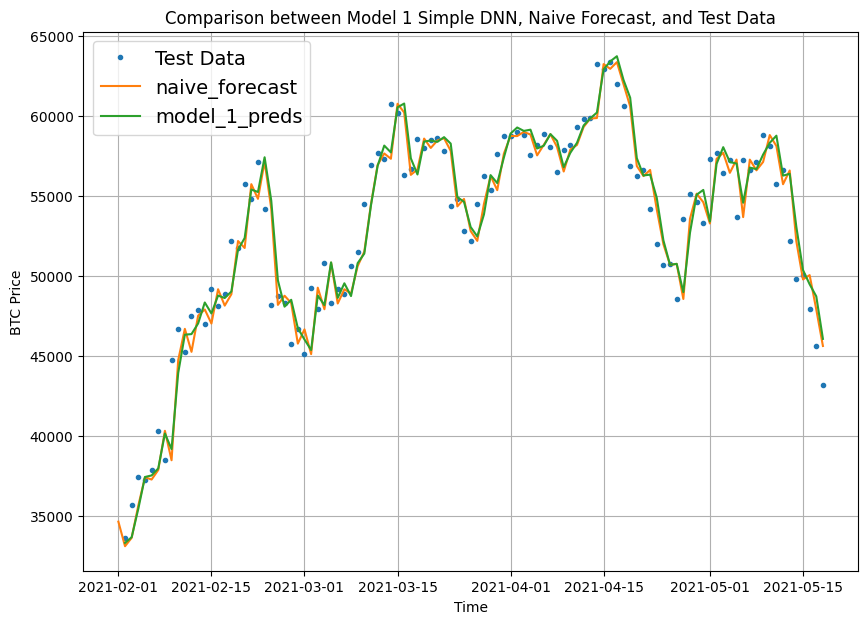

In [49]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps = X_test[1:],
                 values = naive_forecast,
                 start = offset, 
                 format = "-",
                 label = "naive_forecast")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, 
                 format="-",
                 label="model_1_preds")

plt.title("Comparison between Model 1 Simple DNN, Naive Forecast, and Test Data")
plt.show()

## Model 2: Dense (window = 30, horizon = 1)

In [50]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [51]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [52]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [53]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [54]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 670.6856


670.6856079101562

In [55]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 612.3489


612.348876953125

In [56]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [57]:
#Compressing the Test Labels
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([552]), TensorShape([552]))

In [58]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 612.34894,
 'mse': 1289334.5,
 'rmse': 1135.4886,
 'mape': 2.7587388,
 'mase': 1.070392}

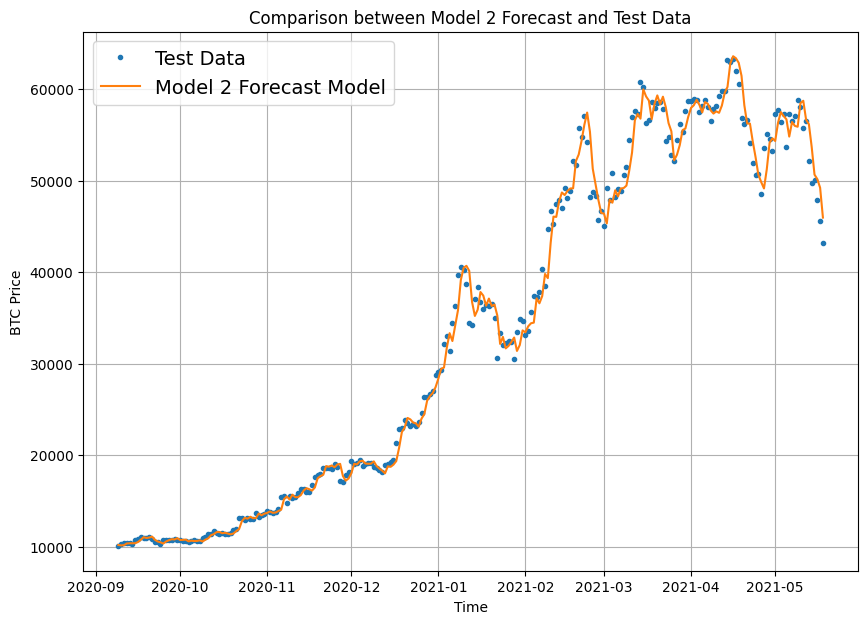

In [59]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label = "Model 2 Forecast Model")
plt.title("Comparison between Model 2 Forecast and Test Data")
plt.show()

## Model 3: Dense (window = 30, horizon = 7)



In [60]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [61]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [62]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [63]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1355.0969


1355.096923828125

In [64]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1241.5647


1241.564697265625

In [65]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9483.415, 9186.064, 9192.834, 9317.015, 9324.798, 9741.275,
        9425.924],
       [8972.568, 8870.023, 8944.513, 8952.367, 9051.646, 9270.153,
        9153.677],
       [8771.432, 8937.917, 8796.475, 8906.459, 9070.864, 9221.037,
        9191.504],
       [8840.459, 9202.774, 9137.281, 9157.769, 9111.959, 9586.743,
        9557.982],
       [8783.054, 8892.888, 9052.263, 8966.117, 8915.122, 9078.29 ,
        9281.612]], dtype=float32)>

In [66]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([551, 7]), TensorShape([552]), TensorShape([556]))

In [67]:
# Evaluate model_3 results (tmulti-dimensional to predict more than one timestep at a time)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  588.4029  ,   339.78348 ,   369.31265 ,   601.25793 ,
          441.273   ,   412.47998 ,   486.64078 ,   491.7629  ,
          371.9232  ,   518.08734 ,   751.6869  ,   779.7775  ,
          795.1245  ,   993.16095 ,   638.8553  ,   301.5791  ,
          114.468544,   223.88449 ,   257.83823 ,   299.313   ,
          218.04164 ,   203.66643 ,   369.90533 ,   345.99045 ,
          149.98982 ,   106.718056,   204.17459 ,   221.8561  ,
          188.34187 ,   121.524414,   217.2929  ,   232.92494 ,
          315.54437 ,   302.03354 ,   307.40973 ,   295.14877 ,
          398.77533 ,   238.31258 ,   222.62758 ,   277.2297  ,
          498.63275 ,   159.07715 ,    99.3411  ,   122.40053 ,
          150.59912 ,   136.71498 ,    98.50286 ,   128.0828  ,
          140.73291 ,   163.34975 ,   149.97363 ,   150.37082 ,
          139.21053 ,   158.73137 ,   235.32896 ,   340.72845 ,
          499.39496 ,   403.4214  ,   490.40787 ,   572.582   ,
          366.72998 ,   180.53635

## Make our evaluation function work for larger horizons

In [68]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1241.5647


1241.564697265625

In [69]:
tf.reduce_mean(model_3_results["mae"]).numpy()

1241.5646

In [70]:
model_2_results["mae"].ndim

0

In [71]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [72]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1241.5646,
 'mse': 5293281.0,
 'rmse': 1422.1549,
 'mape': 5.6162453,
 'mase': 2.2092948}

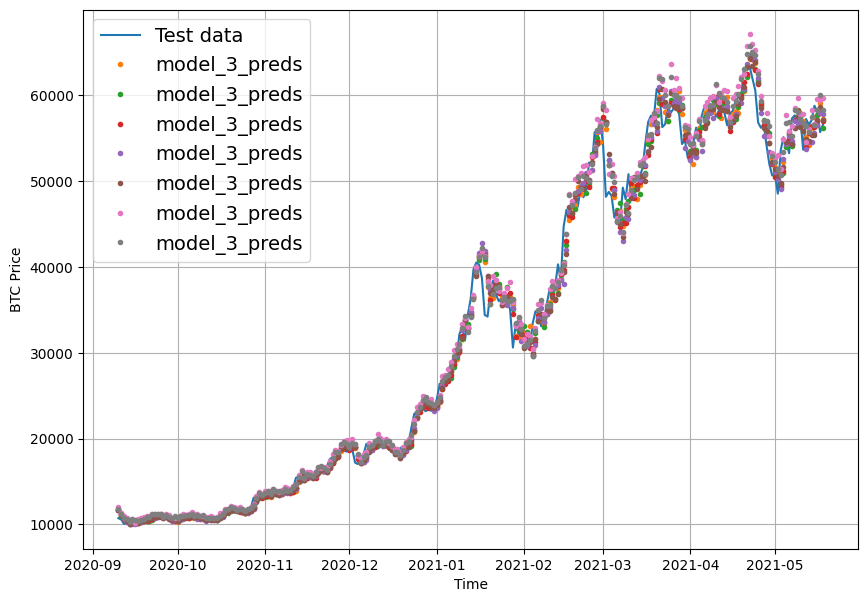

In [73]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

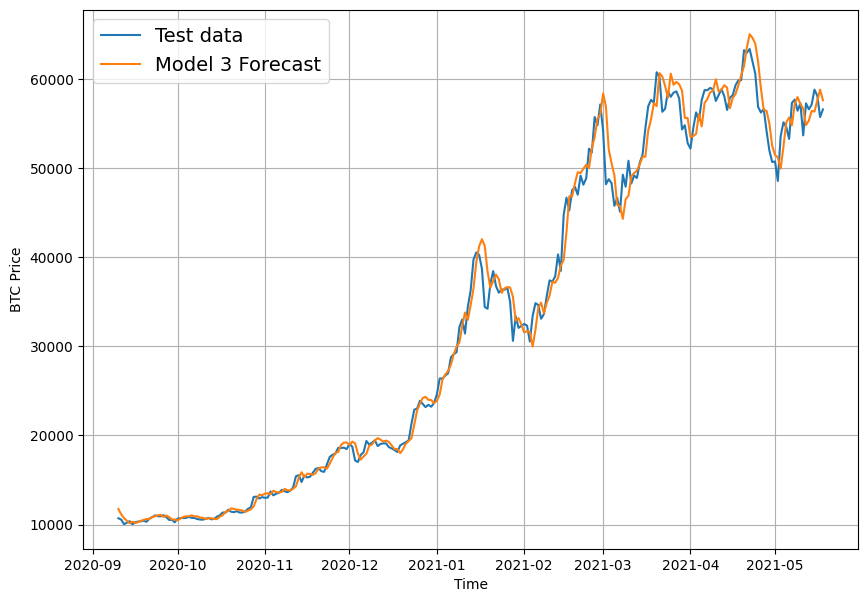

In [74]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label= "Model 3 Forecast")

## Which of our models is performing the best so far? 

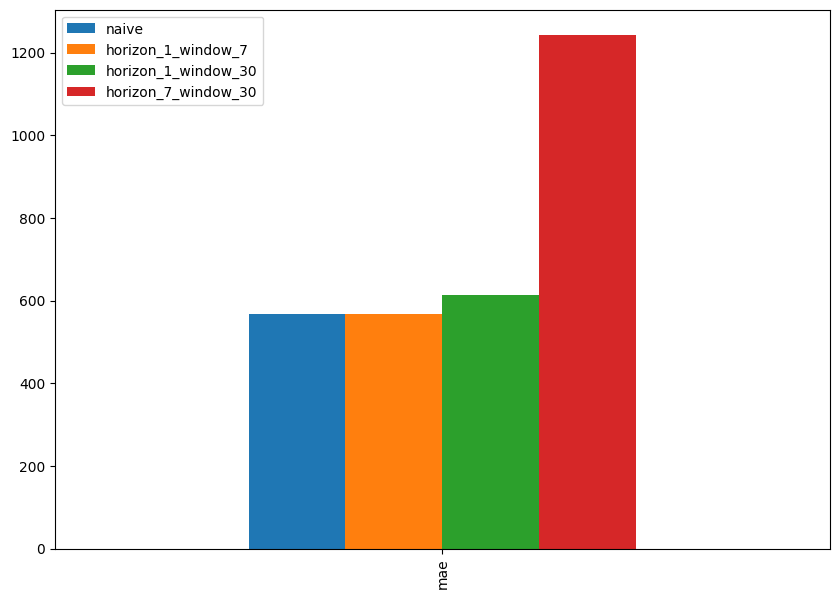

In [75]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

Naive Forecast performs well due to presence of autocorrelation.

## Model 4: Conv1D

In [76]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [77]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [78]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

Prepping the data: 

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`


In [79]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [80]:
# We have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [81]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [82]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [83]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)                      
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 1775.2357  

18/18 [==============================] - 6s 60ms/step - loss: 1506.5092 - val_loss: 1098.8813
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 320.9843 - val_loss: 1709.8099
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 222.0285

18/18 [==============================] - 1s 45ms/step - loss: 217.3331 - val_loss: 1066.1575
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 185.3995

18/18 [==============================] - 1s 45ms/step - loss: 185.3147 - val_loss: 974.6586
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 176.9974 - val_loss: 991.0269
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 169.5701

18/18 [==============================] - 1s 66ms/step - loss: 171.0812 - val_loss: 956.6090
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 173.4390

18/18 [==============================] - 1s 47ms/step - loss: 169.0572 - val_loss: 943.3443
Epoch 8/100
15/18 [========================>.....] - ETA: 0s - loss: 163.2443

18/18 [==============================] - 1s 45ms/step - loss: 166.2307 - val_loss: 937.4957
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 164.1084 - val_loss: 942.5628
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 159.0596

18/18 [==============================] - 1s 45ms/step - loss: 161.4032 - val_loss: 897.4756
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 157.1659

18/18 [==============================] - 1s 49ms/step - loss: 158.4035 - val_loss: 878.9583
Epoch 12/100
18/18 [==============================] - 0s 10ms/step - loss: 155.9589 - val_loss: 938.7690
Epoch 13/100
11/18 [=================>............] - ETA: 0s - loss: 147.5064

18/18 [==============================] - 1s 65ms/step - loss: 154.2495 - val_loss: 863.1426
Epoch 14/100
18/18 [==============================] - 0s 8ms/step - loss: 150.3260 - val_loss: 867.2183
Epoch 15/100
18/18 [==============================] - 0s 8ms/step - loss: 151.3277 - val_loss: 882.1858
Epoch 16/100
11/18 [=================>............] - ETA: 0s - loss: 147.5083

18/18 [==============================] - 1s 60ms/step - loss: 146.4285 - val_loss: 824.1888
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 142.9604 - val_loss: 829.0087
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 145.7080

18/18 [==============================] - 1s 45ms/step - loss: 140.9942 - val_loss: 803.8495
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 137.4959 - val_loss: 807.5682
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 139.6561

18/18 [==============================] - 1s 45ms/step - loss: 138.8869 - val_loss: 775.8869
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 136.3400

18/18 [==============================] - 1s 46ms/step - loss: 136.5077 - val_loss: 739.4824
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 143.4493

18/18 [==============================] - 1s 66ms/step - loss: 135.3533 - val_loss: 729.1216
Epoch 23/100
15/18 [========================>.....] - ETA: 0s - loss: 130.0634

18/18 [==============================] - 1s 45ms/step - loss: 129.6615 - val_loss: 720.3252
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 130.6590

18/18 [==============================] - 1s 45ms/step - loss: 130.6984 - val_loss: 709.1470
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 133.9437

18/18 [==============================] - 1s 45ms/step - loss: 129.4448 - val_loss: 697.3156
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 126.5080 - val_loss: 703.4915
Epoch 27/100
16/18 [=========================>....] - ETA: 0s - loss: 125.7432

18/18 [==============================] - 1s 45ms/step - loss: 125.0255 - val_loss: 679.5100
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 119.9186

18/18 [==============================] - 1s 45ms/step - loss: 122.1768 - val_loss: 671.5321
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 120.7422 - val_loss: 676.8984
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 124.4980 - val_loss: 731.8548
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 133.6667 - val_loss: 863.3974
Epoch 32/100
15/18 [========================>.....] - ETA: 0s - loss: 133.0264

18/18 [==============================] - 1s 44ms/step - loss: 132.3042 - val_loss: 662.3862
Epoch 33/100
15/18 [========================>.....] - ETA: 0s - loss: 123.8683

18/18 [==============================] - 1s 46ms/step - loss: 121.9256 - val_loss: 660.6731
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 117.9341

18/18 [==============================] - 1s 67ms/step - loss: 118.6207 - val_loss: 640.0649
Epoch 35/100
10/18 [===============>..............] - ETA: 0s - loss: 117.2076

18/18 [==============================] - 1s 68ms/step - loss: 117.9023 - val_loss: 635.8909
Epoch 36/100
18/18 [==============================] - 0s 10ms/step - loss: 119.1727 - val_loss: 662.1672
Epoch 37/100
16/18 [=========================>....] - ETA: 0s - loss: 118.1134

18/18 [==============================] - 1s 46ms/step - loss: 118.6368 - val_loss: 625.7244
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 115.9533 - val_loss: 626.0593
Epoch 39/100
18/18 [==============================] - 0s 7ms/step - loss: 117.4153 - val_loss: 677.9711
Epoch 40/100
15/18 [========================>.....] - ETA: 0s - loss: 114.7943

18/18 [==============================] - 1s 70ms/step - loss: 114.2429 - val_loss: 614.5922
Epoch 41/100
15/18 [========================>.....] - ETA: 0s - loss: 117.4571

18/18 [==============================] - 1s 47ms/step - loss: 113.5388 - val_loss: 612.4872
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 117.7695 - val_loss: 623.7653
Epoch 43/100
15/18 [========================>.....] - ETA: 0s - loss: 112.9983

18/18 [==============================] - 1s 47ms/step - loss: 112.8410 - val_loss: 605.9094
Epoch 44/100
15/18 [========================>.....] - ETA: 0s - loss: 112.1239

18/18 [==============================] - 1s 46ms/step - loss: 112.7896 - val_loss: 598.8970
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0826 - val_loss: 602.8224
Epoch 46/100
15/18 [========================>.....] - ETA: 0s - loss: 116.3303

18/18 [==============================] - 1s 45ms/step - loss: 113.6083 - val_loss: 595.7962
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 115.4935 - val_loss: 724.0455
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 114.9365 - val_loss: 646.0147
Epoch 49/100
16/18 [=========================>....] - ETA: 0s - loss: 118.4331

18/18 [==============================] - 1s 44ms/step - loss: 119.0471 - val_loss: 590.5669
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 110.6840 - val_loss: 636.9836
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 111.5963 - val_loss: 596.3686
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3298 - val_loss: 605.9061
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3253 - val_loss: 608.9259
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 115.7562 - val_loss: 646.8775
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3244 - val_loss: 601.7617
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7890 - val_loss: 748.1863
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 125.1327 - val_loss: 663.7801
Epoch 58/100
16/18 [=========================>....] - ETA: 0s - loss: 114.73

18/18 [==============================] - 1s 44ms/step - loss: 114.6193 - val_loss: 587.0047
Epoch 59/100
16/18 [=========================>....] - ETA: 0s - loss: 111.0114

18/18 [==============================] - 1s 44ms/step - loss: 111.2237 - val_loss: 580.0375
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 109.1751 - val_loss: 605.7146
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8274 - val_loss: 588.5493
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 108.9630 - val_loss: 595.8707
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0763 - val_loss: 625.7787
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 111.7583 - val_loss: 678.7572
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 114.2273 - val_loss: 588.0502
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 112.4662 - val_loss: 580.1901
Epoch 67/100
18/18 [==============================] - 0s 12ms/step - loss: 107.6524 - val_loss: 604.4604
Epoch 68/100
18/18 [==============================] - 0s 11ms/step - loss: 

18/18 [==============================] - 1s 67ms/step - loss: 109.7852 - val_loss: 576.5494
Epoch 73/100
18/18 [==============================] - 0s 10ms/step - loss: 109.8784 - val_loss: 604.9847
Epoch 74/100
18/18 [==============================] - 0s 9ms/step - loss: 109.1799 - val_loss: 582.1523
Epoch 75/100
18/18 [==============================] - 0s 9ms/step - loss: 109.2825 - val_loss: 613.1979
Epoch 76/100
10/18 [===============>..............] - ETA: 0s - loss: 112.9831

18/18 [==============================] - 1s 47ms/step - loss: 109.0437 - val_loss: 573.2704
Epoch 77/100
12/18 [===================>..........] - ETA: 0s - loss: 112.7722

18/18 [==============================] - 1s 46ms/step - loss: 108.7456 - val_loss: 572.6500
Epoch 78/100
14/18 [======================>.......] - ETA: 0s - loss: 107.8862

18/18 [==============================] - 1s 67ms/step - loss: 108.2387 - val_loss: 571.5727
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 107.5426 - val_loss: 588.7571
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 107.7514 - val_loss: 583.7454
Epoch 81/100
16/18 [=========================>....] - ETA: 0s - loss: 107.7549

18/18 [==============================] - 1s 45ms/step - loss: 107.7897 - val_loss: 570.9637
Epoch 82/100
15/18 [========================>.....] - ETA: 0s - loss: 115.8346

18/18 [==============================] - 1s 45ms/step - loss: 115.1780 - val_loss: 569.6598
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 110.9617 - val_loss: 664.7436
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 112.1646 - val_loss: 583.6154
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2058 - val_loss: 575.6351
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9365 - val_loss: 592.6417
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 106.6633 - val_loss: 595.5557
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 107.5139 - val_loss: 575.3231
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 107.5854 - val_loss: 569.7655
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 106.0302 - val_loss: 596.3081
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 11

18/18 [==============================] - 1s 49ms/step - loss: 105.7493 - val_loss: 567.4005
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 108.9179 - val_loss: 635.1230
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9924 - val_loss: 570.1639
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 106.8679 - val_loss: 569.2595
Epoch 99/100
14/18 [======================>.......] - ETA: 0s - loss: 103.2247

18/18 [==============================] - 1s 47ms/step - loss: 106.7588 - val_loss: 565.3358
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2760 - val_loss: 646.9343


In [84]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Evaluate model... 
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 646.9343


646.934326171875

In [86]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 565.3358


565.3358154296875

In [87]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8877.054, 8787.596, 9031.437, 8783.438, 8741.31 , 8753.937,
       8690.908, 8526.848, 8471.717, 8532.135], dtype=float32)>

In [88]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 565.33575,
 'mse': 1163966.2,
 'rmse': 1078.8727,
 'mape': 2.5254514,
 'mase': 0.9931383}

## Model 5: RNN (LSTM)


In [89]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 5s 157ms/step - loss: 2203.2385 - val_loss: 8080.1719
Epoch 2/100
18/18 [==============================] - 2s 140ms/step - loss: 505.6895 - val_loss: 1772.7141
Epoch 3/100
18/18 [==============================] - 2s 121ms/step - loss: 208.7185 - val_loss: 1054.2837
Epoch 4/100
18/18 [==============================] - 2s 116ms/step - loss: 184.4602 - val_loss: 1033.2169
Epoch 5/100
18/18 [==============================] - 2s 116ms/step - loss: 173.0748 - val_loss: 995.5209
Epoch 6/100
18/18 [==============================] - 3s 184ms/step - loss: 184.0702 - val_loss: 989.3224
Epoch 7/100
18/18 [==============================] - 2s 116ms/step - loss: 176.5109 - val_loss: 884.5600
Epoch 8/100
18/18 [==============================] - 2s 115ms/step - loss: 162.6725 - val_loss: 875.3234
Epoch 9/100
18/18 [==============================] - 2s 115ms/step - loss: 160.8801 - val_loss: 873.0678
Epoch 10/100
18/18 [==============================

In [90]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 588.0685


588.0685424804688

In [91]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8969.179, 8824.43 , 8989.134, 8849.996, 8789.356], dtype=float32)>

In [92]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 588.06854,
 'mse': 1243639.9,
 'rmse': 1115.186,
 'mape': 2.6679647,
 'mase': 1.0330735}

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?
* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?
How about the bitcoin halving events?
https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [93]:
# Let's make a multivariate time series 
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [94]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [95]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [96]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [97]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


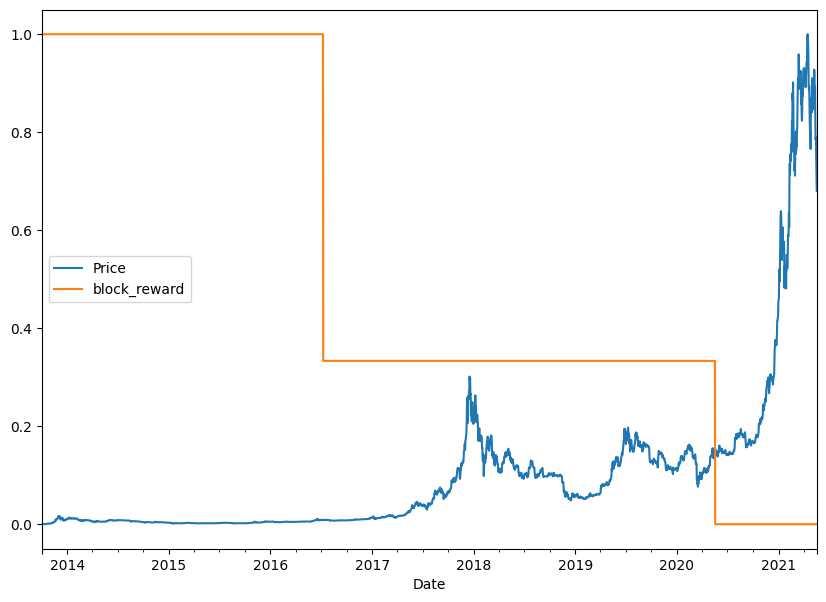

In [98]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [99]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [100]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [101]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [102]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [103]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [104]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [105]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)                          
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1883.6827 

18/18 [==============================] - 2s 43ms/step - loss: 1883.6827 - val_loss: 1242.4065
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 376.3436 - val_loss: 1872.7532
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 260.4097

18/18 [==============================] - 1s 39ms/step - loss: 217.0578 - val_loss: 1211.1774
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 186.2204

18/18 [==============================] - 1s 48ms/step - loss: 173.7351 - val_loss: 971.3199
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 166.7684

18/18 [==============================] - 1s 49ms/step - loss: 161.9674 - val_loss: 893.7722
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 158.8924

18/18 [==============================] - 1s 45ms/step - loss: 160.3405 - val_loss: 867.0333
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 152.6801

18/18 [==============================] - 1s 33ms/step - loss: 152.6801 - val_loss: 836.9018
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 150.4019

18/18 [==============================] - 1s 34ms/step - loss: 151.0296 - val_loss: 824.1054
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 149.2754 - val_loss: 848.4995
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 146.0513

18/18 [==============================] - 1s 33ms/step - loss: 146.0513 - val_loss: 795.6606
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 142.6565 - val_loss: 799.7653
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 141.1920 - val_loss: 839.4199
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 142.4404

18/18 [==============================] - 1s 35ms/step - loss: 141.9101 - val_loss: 791.8930
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 137.3134 - val_loss: 795.2502
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 137.4716

18/18 [==============================] - 1s 32ms/step - loss: 137.4716 - val_loss: 745.3373
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 134.0962 - val_loss: 764.7855
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 133.0267 - val_loss: 779.6620
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 134.4771

18/18 [==============================] - 1s 32ms/step - loss: 133.8347 - val_loss: 737.2682
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 131.0170

18/18 [==============================] - 1s 33ms/step - loss: 130.2217 - val_loss: 734.0085
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 129.5254

18/18 [==============================] - 1s 50ms/step - loss: 129.5254 - val_loss: 704.4802
Epoch 21/100
15/18 [========================>.....] - ETA: 0s - loss: 130.8902

18/18 [==============================] - 1s 33ms/step - loss: 131.2562 - val_loss: 698.7562
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 126.6292 - val_loss: 705.2950
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 126.8352

18/18 [==============================] - 1s 32ms/step - loss: 126.8352 - val_loss: 676.7994
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 126.4730

18/18 [==============================] - 1s 32ms/step - loss: 126.4730 - val_loss: 670.8016
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 133.9541

18/18 [==============================] - 1s 32ms/step - loss: 124.6329 - val_loss: 667.3531
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 127.0782

18/18 [==============================] - 1s 30ms/step - loss: 127.0782 - val_loss: 658.9971
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 124.9437

18/18 [==============================] - 1s 32ms/step - loss: 125.2705 - val_loss: 653.4534
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 122.2042 - val_loss: 654.9504
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 120.4309

18/18 [==============================] - 1s 31ms/step - loss: 120.4309 - val_loss: 648.3768
Epoch 30/100
14/18 [======================>.......] - ETA: 0s - loss: 125.4959

18/18 [==============================] - 1s 44ms/step - loss: 124.9486 - val_loss: 647.6659
Epoch 31/100
18/18 [==============================] - 0s 9ms/step - loss: 125.5756 - val_loss: 701.8622
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 121.6238

18/18 [==============================] - 1s 46ms/step - loss: 120.2687 - val_loss: 636.2770
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 119.3428 - val_loss: 696.2903
Epoch 34/100
18/18 [==============================] - 0s 9ms/step - loss: 124.7410 - val_loss: 648.6246
Epoch 35/100
12/18 [===================>..........] - ETA: 0s - loss: 121.3784

18/18 [==============================] - 1s 45ms/step - loss: 118.4692 - val_loss: 629.2197
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 122.0173 - val_loss: 635.0233
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 120.1032

18/18 [==============================] - 1s 32ms/step - loss: 120.1032 - val_loss: 624.5407
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 116.1764

18/18 [==============================] - 1s 33ms/step - loss: 116.0103 - val_loss: 619.1909
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 117.8279 - val_loss: 633.6591
Epoch 40/100
14/18 [======================>.......] - ETA: 0s - loss: 116.5779

18/18 [==============================] - 1s 34ms/step - loss: 115.3043 - val_loss: 615.5833
Epoch 41/100
18/18 [==============================] - 0s 7ms/step - loss: 116.7791 - val_loss: 644.9262
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 120.5234 - val_loss: 616.3650
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 118.5982 - val_loss: 639.8909
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 117.8857

18/18 [==============================] - 1s 34ms/step - loss: 118.6197 - val_loss: 602.9921
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 118.0401 - val_loss: 663.3129
Epoch 46/100
16/18 [=========================>....] - ETA: 0s - loss: 117.5378

18/18 [==============================] - 1s 34ms/step - loss: 116.5730 - val_loss: 597.1498
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 112.9841 - val_loss: 614.7863
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 113.1038 - val_loss: 690.5155
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 179.0738

18/18 [==============================] - 1s 32ms/step - loss: 122.7157 - val_loss: 593.0139
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3779 - val_loss: 593.7809
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 113.0554 - val_loss: 659.7420
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 123.9693 - val_loss: 624.4140
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 117.2420 - val_loss: 599.4275
Epoch 54/100
18/18 [==============================] - ETA: 0s - loss: 111.0099

18/18 [==============================] - 1s 32ms/step - loss: 111.0099 - val_loss: 590.7742
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8982 - val_loss: 605.6606
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 114.4197 - val_loss: 806.0164
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 134.8486 - val_loss: 749.0750
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 120.9333 - val_loss: 650.1419
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 80.8866

18/18 [==============================] - 1s 32ms/step - loss: 115.9977 - val_loss: 584.7265
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0286 - val_loss: 593.0475
Epoch 61/100
18/18 [==============================] - ETA: 0s - loss: 110.2346

18/18 [==============================] - 1s 52ms/step - loss: 110.2346 - val_loss: 583.5720
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1697 - val_loss: 583.7354
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3592 - val_loss: 626.9572
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2864 - val_loss: 595.0519
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1437 - val_loss: 587.1705
Epoch 66/100
17/18 [===========================>..] - ETA: 0s - loss: 110.6357

18/18 [==============================] - 1s 34ms/step - loss: 110.3603 - val_loss: 579.9325
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 109.5456 - val_loss: 667.6783
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1846 - val_loss: 638.9531
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 127.0209 - val_loss: 659.9131
Epoch 70/100
17/18 [===========================>..] - ETA: 0s - loss: 128.0318

18/18 [==============================] - 1s 33ms/step - loss: 129.0423 - val_loss: 577.8315
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3199 - val_loss: 592.7383
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 109.0091 - val_loss: 578.1882
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3074 - val_loss: 687.0206
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 177.6084

18/18 [==============================] - 1s 43ms/step - loss: 109.0337 - val_loss: 574.0315
Epoch 75/100
13/18 [====================>.........] - ETA: 0s - loss: 106.8468

18/18 [==============================] - 1s 47ms/step - loss: 109.3746 - val_loss: 573.3848
Epoch 76/100
18/18 [==============================] - 0s 8ms/step - loss: 110.3257 - val_loss: 575.6492
Epoch 77/100
18/18 [==============================] - 0s 8ms/step - loss: 109.8420 - val_loss: 577.2716
Epoch 78/100
11/18 [=================>............] - ETA: 0s - loss: 108.3365

18/18 [==============================] - 1s 48ms/step - loss: 112.4621 - val_loss: 569.2326
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 110.5734 - val_loss: 589.6614
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7587 - val_loss: 582.1393
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2815 - val_loss: 585.4947
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4954 - val_loss: 575.5011
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0163 - val_loss: 687.0224
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2504 - val_loss: 591.8926
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1597 - val_loss: 587.3164
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3751 - val_loss: 598.3682
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 10

18/18 [==============================] - 1s 34ms/step - loss: 107.8607 - val_loss: 565.2480
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 108.9113 - val_loss: 614.7522
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 116.8681 - val_loss: 615.3037
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9298 - val_loss: 567.4755
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6898 - val_loss: 609.4926
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4266 - val_loss: 580.2553
Epoch 95/100
16/18 [=========================>....] - ETA: 0s - loss: 104.1156

18/18 [==============================] - 1s 32ms/step - loss: 106.1105 - val_loss: 564.9509
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4488 - val_loss: 704.4518
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8150 - val_loss: 583.1822
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6802 - val_loss: 586.8846
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2475 - val_loss: 567.1686
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0891 - val_loss: 626.7430


In [106]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 626.7430


626.7429809570312

In [107]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 564.9509


564.9508666992188

In [108]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8871.805, 8777.83 , 9009.673, 8797.34 , 8763.993, 8736.861,
       8679.294, 8535.247, 8466.448, 8520.746], dtype=float32)>

In [109]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 564.95087,
 'mse': 1160372.9,
 'rmse': 1077.206,
 'mape': 2.5300746,
 'mase': 0.9924622}

In [115]:
#Compared to Model 1 Resultss
model_1_results

{'mae': 567.873,
 'mse': 1174147.8,
 'rmse': 1083.5809,
 'mape': 2.5482697,
 'mase': 0.99759555}

In [120]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

## Model 8: Creating an ensemble (stacking different models together)
An ensemble leverages the wisdom of the crowd effect.
It combines many *different* models to predict a common goal.

In [121]:
def get_ensemble_models(horizon=HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned: 
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize dense layers with normal distribution for estimating prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models 

In [122]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 708: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 808: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 311: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 411: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 134: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 304: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 235: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 335: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

### Make predictions with our ensemble model

In [123]:
ensemble_models

In [124]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [125]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 50ms/step
CPU times: user 789 ms, sys: 39.8 ms, total: 829 ms
Wall time: 927 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8792.652 ,  8795.912 ,  9076.471 , ..., 50078.656 , 48320.867 ,
        45977.555 ],
       [ 8733.516 ,  8774.225 ,  8930.08  , ..., 50324.902 , 47264.336 ,
        47143.17  ],
       [ 8816.481 ,  8790.982 ,  9066.    , ..., 50469.17  , 48074.49  ,
        45707.902 ],
       ...,
       [ 8763.1875,  8829.089 ,  9107.128 , ..., 48952.473 , 48860.31  ,
        46257.484 ],
       [ 8797.329 ,  8770.856 ,  9029.612 , ..., 49392.707 , 47833.492 ,
        45413.387 ],
       [ 8823.016 ,  8803.159 ,  9068.883 , ..., 50345.77  , 48387.336 ,
        46223.844 ]], dtype=float32)>

In [126]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8792.652 ,  8795.912 ,  9076.471 , ..., 50078.656 , 48320.867 ,
        45977.555 ],
       [ 8733.516 ,  8774.225 ,  8930.08  , ..., 50324.902 , 47264.336 ,
        47143.17  ],
       [ 8816.481 ,  8790.982 ,  9066.    , ..., 50469.17  , 48074.49  ,
        45707.902 ],
       ...,
       [ 8763.1875,  8829.089 ,  9107.128 , ..., 48952.473 , 48860.31  ,
        46257.484 ],
       [ 8797.329 ,  8770.856 ,  9029.612 , ..., 49392.707 , 47833.492 ,
        45413.387 ],
       [ 8823.016 ,  8803.159 ,  9068.883 , ..., 50345.77  , 48387.336 ,
        46223.844 ]], dtype=float32)>

In [127]:
#Combine Ensemble Preds into Point Predictions
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8786.223, 8778.563, 9044.325, 8727.327, 8770.135, 8715.02 ,
       8644.43 , 8497.153, 8450.051, 8514.312], dtype=float32)>

In [128]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8789.457, 8790.982, 9046.   , 8733.926, 8776.968, 8705.296,
       8642.896, 8505.048, 8450.826, 8516.183], dtype=float32)

In [129]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 566.0932,
 'mse': 1138788.6,
 'rmse': 1067.1404,
 'mape': 2.5635004,
 'mase': 0.994469}

In [130]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 564.18115,
 'mse': 1134199.5,
 'rmse': 1064.988,
 'mape': 2.5489936,
 'mase': 0.99111}

In [131]:
model_1_results

{'mae': 567.873,
 'mse': 1174147.8,
 'rmse': 1083.5809,
 'mape': 2.5482697,
 'mase': 0.99759555}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble
One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialzed models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To the get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

* https://en.wikipedia.org/wiki/1.96
* https://eng.uber.com/neural-networks-uncertainty-estimation/

In [132]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds 
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [133]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

In [134]:
X_test.index[:10]

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

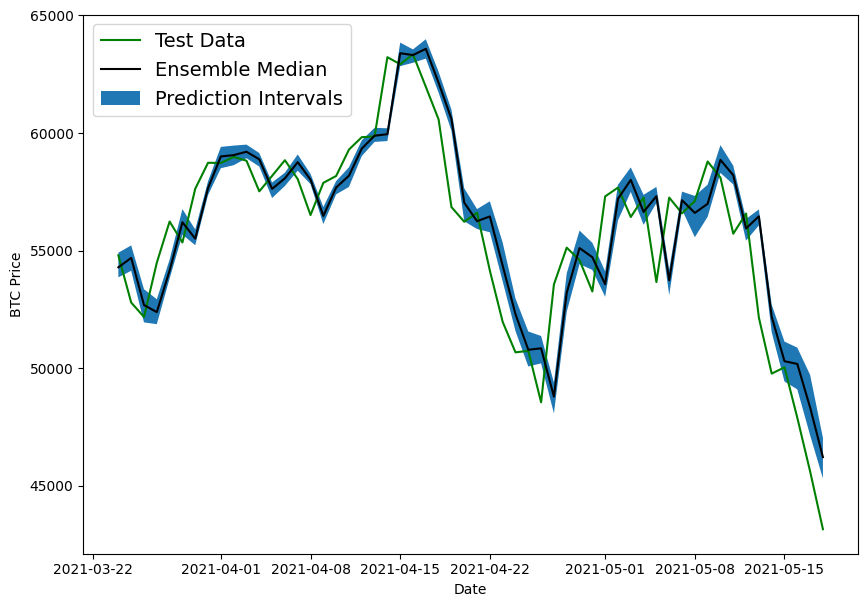

In [135]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

There are two major types of uncertainty in machine learning :
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

## Model 9: Train a model on the full historical data to make predictions into the future

In [136]:
HORIZON = 1
WINDOW_SIZE = 7
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [137]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [138]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [139]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [140]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

In [141]:
# How many timestesp to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
 * a list of values (Bitcoin historical data)
 * a trained model (such as `model_9`)
 * a window into the future to predict (our `INTO_FUTURE` variable)
 * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [142]:
tf.expand_dims(y_all[-WINDOW_SIZE:], axis=0)

<tf.Tensor: shape=(1, 7), dtype=float64, numpy=
array([[56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361, 43144.47129086]])>

In [143]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [144]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 68ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55540.390625

1/1 [==============================] - 0s 25ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55540.390625  ] -> Prediction: 52577.0390625

1/1 [==============================] - 0s 30ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55540.390625   52577.0390625 ] -> Prediction: 49967.328125

1/1 [==============================] - 0s 26ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55540.390625   52577.0390625  49967.328125  ] -> Prediction: 46741.60546875

1/1 [==============================] - 0s 26ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55540.390625
 52577.0390625  49967.328125   46741.60546875] -> 

### Plot future forecasts

In [145]:
future_forecast

[55540.39,
 52577.04,
 49967.33,
 46741.605,
 46890.926,
 46705.54,
 49246.215,
 54857.383,
 51587.67,
 47948.094,
 45719.793,
 47773.766,
 49678.773,
 52379.78]

In [146]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [147]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [148]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [149]:
bitcoin_prices.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

In [150]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55540.39 , 52577.04 , 49967.33 , 46741.605, 46890.926,
        46705.54 , 49246.215, 54857.383, 51587.67 , 47948.094, 45719.793,
        47773.766, 49678.773, 52379.78 ], dtype=float32))

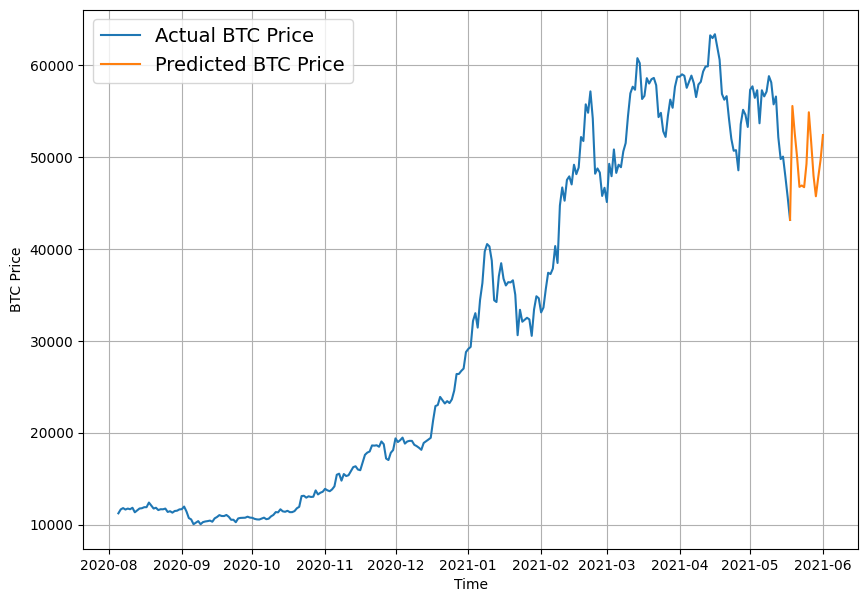

In [151]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: The turkey problem 🦃

In [152]:
# introduce a turkey problem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [153]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [154]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

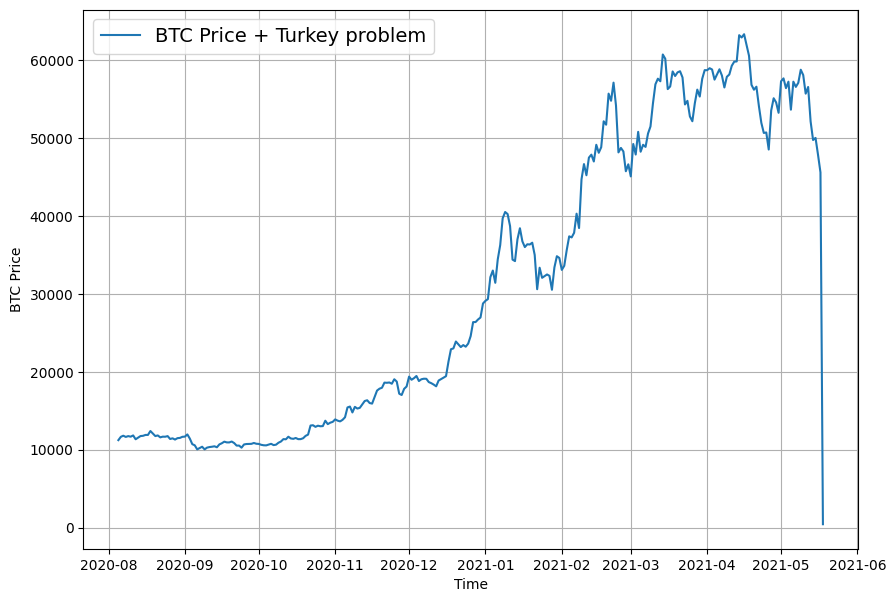

In [155]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [156]:
HORIZON = 1
WINDOW_SIZE = 7
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [157]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


### Build a turkey model (model to predict on turkey data)

In [158]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [159]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 733.5464


733.5464477539062

In [160]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 641.2053


641.2052612304688

In [161]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8867.055, 8800.565, 9044.502, 8797.313, 8758.776, 8736.839,
       8696.626, 8550.422, 8462.522, 8544.422], dtype=float32)>

In [162]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17141.38,
 'mse': 615325760.0,
 'rmse': 23739.56,
 'mape': 121.54883,
 'mase': 26.526342}

In [163]:
model_1_results

{'mae': 567.873,
 'mse': 1174147.8,
 'rmse': 1083.5809,
 'mape': 2.5482697,
 'mase': 0.99759555}

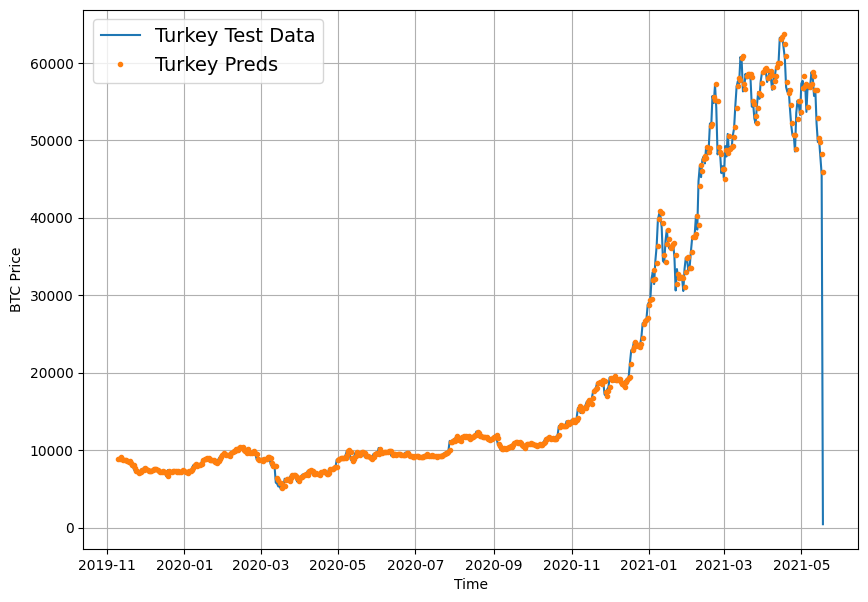

In [164]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):], 
                 format="-",
                 label="Turkey Test Data", 
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);


## Compare models

In [165]:
ensemble_results

{'mae': 564.18115,
 'mse': 1134199.5,
 'rmse': 1064.988,
 'mape': 2.5489936,
 'mase': 0.99111}

In [166]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)                            

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,567.872986,1.174148e+06,1083.580933,2.548270,0.997596
model_2_dense_w30_h1,612.348938,1.289334e+06,1135.488647,2.758739,1.070392
model_3_dense_w30_h7,1241.564575,5.293281e+06,1422.154907,5.616245,2.209295
model_4_CONV1D,565.335754,1.163966e+06,1078.872681,2.525451,0.993138
model_5_LSTM,588.068542,1.243640e+06,1115.186035,2.667965,1.033074
model_6_multivariate,564.950867,1.160373e+06,1077.206055,2.530075,0.992462
model_8_ensemble,564.181152,1.134200e+06,1064.988037,2.548994,0.991110
model_10_turkey,17141.380859,6.153258e+08,23739.560547,121.548828,26.526342


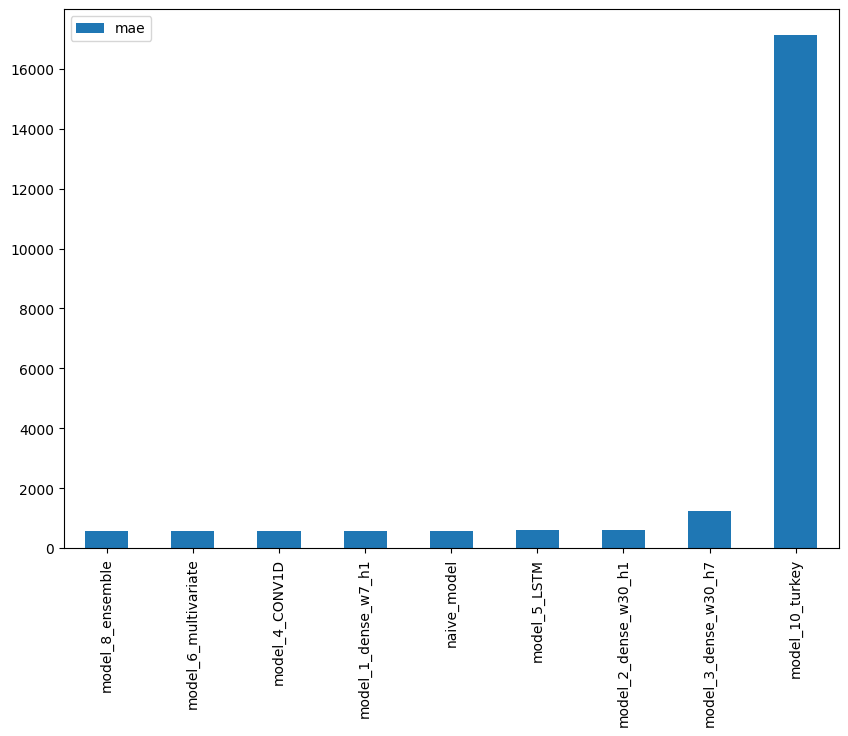

In [167]:
# Sort model results by MAE and plot them 
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");